In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:\Datasets\\Walmart_Store_sales.csv')

In [103]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,3


In [4]:
#changing the data type of the ‘Date’ column because it is an object type
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\sanny\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sanny\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sanny\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sanny\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [5]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [17]:
#Statistical Tasks-

In [6]:
#Which store has maximum sales?
total_sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [7]:
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


In [ ]:
#Which store has maximum standard deviation i.e., the sales vary a lot. 
#Also, find out the coefficient of mean to standard deviation

In [8]:
df_std=df.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)

In [9]:
pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0


In [10]:
#Stone which has maximum Standard Deviation
pd.DataFrame(df_std).head(1)

,Weekly_Sales
Store,
14,317570.0


In [ ]:
#Coefficient of mean to standard deviation

In [15]:
store14=df[df.Store==14].Weekly_Sales

In [12]:
mean_to_stddev=store14.std()/store14.mean()*100

In [13]:
print(mean_to_stddev,'%')

15.713673600948338 %


In [ ]:
#Which store/s has a good quarterly growth rate in Q3’2012?

In [16]:
#Finding the Q2 sales then Q3 sales,then taking out the difference to get the growth rate.
q2_sales=df[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [17]:
q3_sales=df[(df['Date']>='2012-07-01') & (df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [101]:
#Growth rate = ((present-past)/past)*100
df_2012=pd.DataFrame({'Q2 Sales':q2_sales,'Q3 Sales':q3_sales,'Difference':(q3_sales-q2_sales),'Growth Rate %':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by='Growth Rate %',ascending=False).head()
df_2012

,Q2 Sales,Q3 Sales,Difference,Growth Rate %
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.789289
7,7613594.0,7322394.0,-291200.0,-3.824738
35,10753571.0,10252123.0,-501448.0,-4.663084
26,13218290.0,12417575.0,-800715.0,-6.057629
39,20191586.0,18899955.0,-1291631.0,-6.396877


In [107]:
max_sales_2012Q3=df_2012.groupby('Store')['Growth Rate %'].sum()
max_sales_2012Q3.idxmax()

16

No store shown quaterly growth rate in Q3'2012, although store 16 has maximum growth rate as compared to others

In [ ]:
#Some holidays have a negative impact on sales.Find out holidays that have higher
#sales than the mean sales in the non-holiday season for all stores together.

We have 4 Holiday Events, 
(1) Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13,
(2) Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13,
(3) Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13, 
(4) Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13.

In [ ]:
#Calculating the holiday event sales of each of the events and then find the non-holiday sales.

In [41]:
#Holiday events
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [42]:
Super_Bowl_Sales =round(df[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_Sales =round(df[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_Sales =round(df[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_Sales =round(df[df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [43]:
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.99, 1039182.83, 1471273.43, 960833.11)

In [ ]:
#Non-holiday Sales and Comparison

In [158]:
non_holiday_sales=round(df[df['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [166]:
 pd.DataFrame([{'Super Bowl Sales':Super_Bowl_Sales,'Labour day Sales':Labour_Day_Sales,'Thanksgiving Sales':Thanksgiving_Sales,'Christmas Sales':Christmas_Sales,'non holiday Sales':non_holiday_sales}]).T

,0
Super Bowl Sales,NaN
Labour day Sales,1039182.83
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
non holiday Sales,1041256.38


Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38)

In [ ]:
#Provide a monthly and semester view of sales in units and give insights.

Plotting a month-wise bar graph for weekly sales to get an idea about which month has the maximum sales, then will plot the semester-wise bar graph for weekly sales to get some insights about the semester's weekly sales.

In [70]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
#Monthwise Sales

Text(0.5, 1.0, 'Monthwise Sales')

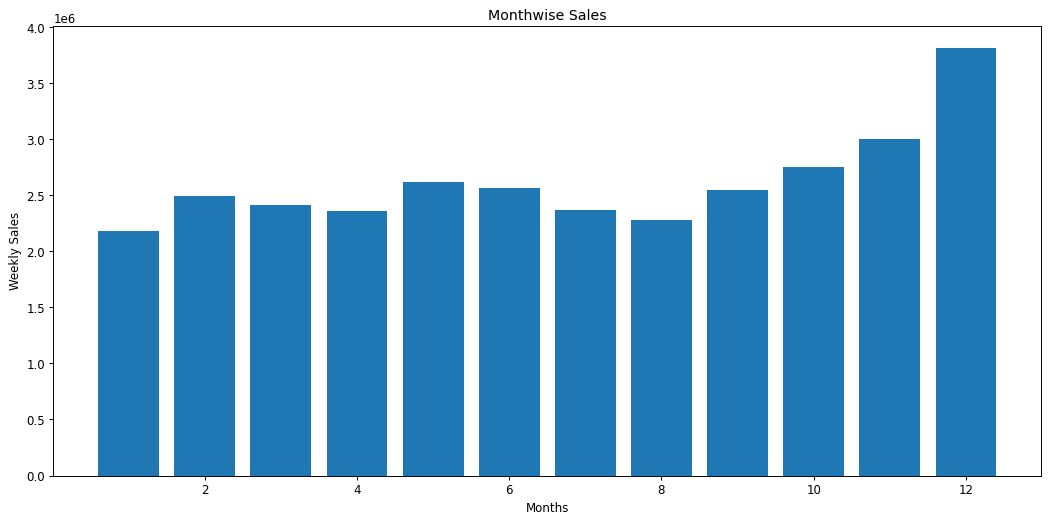

In [55]:
plt.figure(figsize=(15,7), dpi=85)
plt.bar(df['month'],df['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')
plt.title('Monthwise Sales')

In [60]:
#Semesterwise Sales
df['semester'] = np.where(df['month']< 7, 1, 2)

In [65]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1


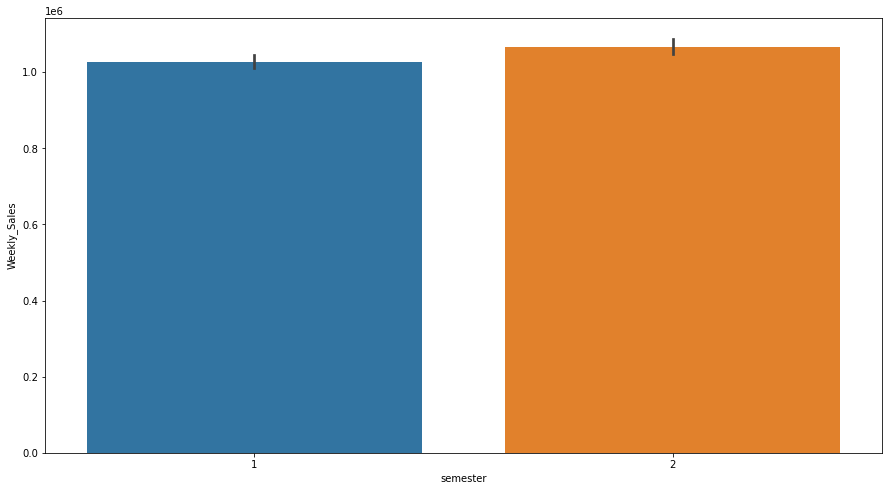

In [69]:
plt.figure(figsize =(15,8))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=df)

Insights drawn-(1)December month has the highest weekly sales. (2) Semester 2 has the highest weekly sales.

Model Building-
First, define dependent and independent variables. Here, store, fuel price, CPI, unemployment, day, month, and year are the independent variables and weekly sales is the dependent variable. Now, it’s time to train the model. Import train_test_spit from sklearn.model_selection and train 80% of the data and test on the rest 20% of the data.

In [72]:
#Define independent and dependent variable
# Select features and target 
x=df[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y=df['Weekly_Sales']

In [74]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [75]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Linear Regression:

Accuracy: 14.150081851796148
Mean Absolute Error: 424842.5167883451
Mean Squared Error: 260951523960.7909
Root Mean Squared Error: 510834.1452573339


C:\Users\sanny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


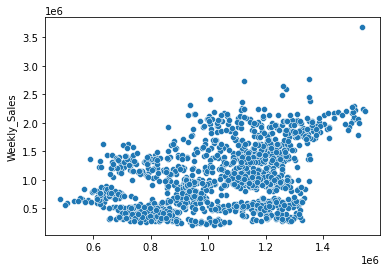

In [99]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 89.77596575535517
Mean Absolute Error: 104578.55556939874
Mean Squared Error: 31686187732.711853
Root Mean Squared Error: 178006.14521052878


C:\Users\sanny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


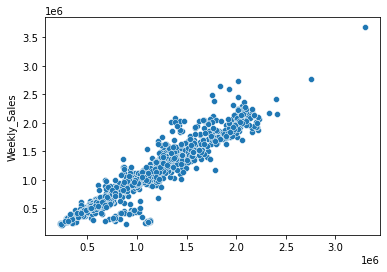

In [94]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Here, we have used 2 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives an accuracy of almost 89%. so, it is the best model to forecast weekly sales.

In [108]:
#Change dates into days by creating new variable.

df['day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,Monday


In [111]:
experiment_day_start=5
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['exp_day'] = (df['Date']-df['Date'].min()).dt.days + experiment_day_start

In [112]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester,day,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,Sunday,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Thursday,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,Friday,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,Friday,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,Monday,118


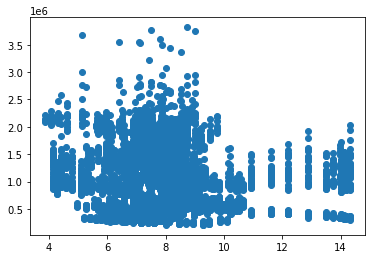

-0.10617608965795418


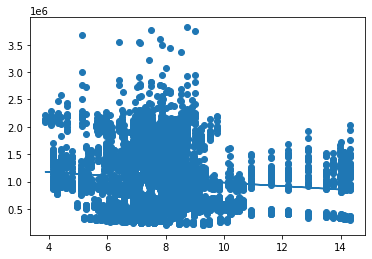

In [117]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = df['Unemployment']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

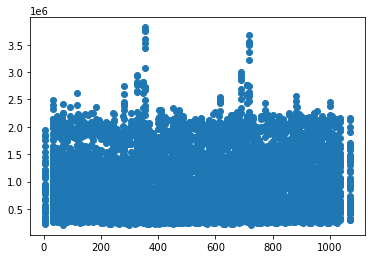

0.004591803306455495


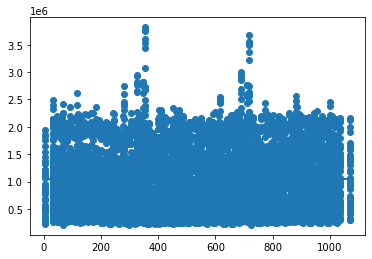

In [121]:
# Weekly_Sales vs exp_day
x = df['exp_day']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

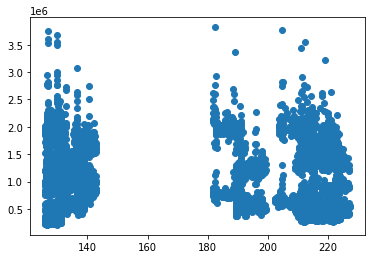

-0.07263416204017632


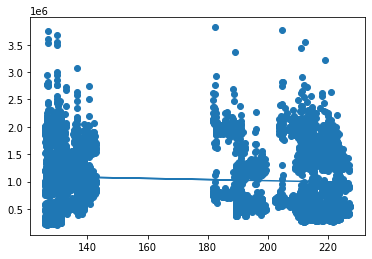

In [119]:
#Weekly sales vs CPI
x = df['CPI']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

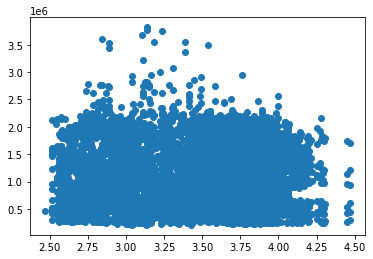

0.009463786314475123


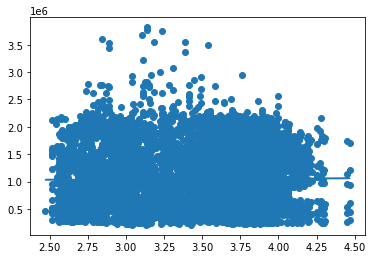

In [124]:
#Weekly sales vs Fuel price
x = df['Fuel_Price']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

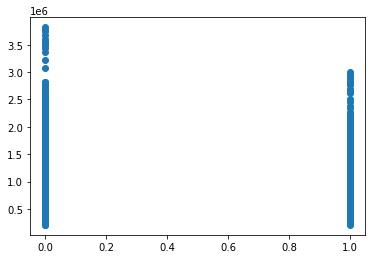

0.03689096801041456


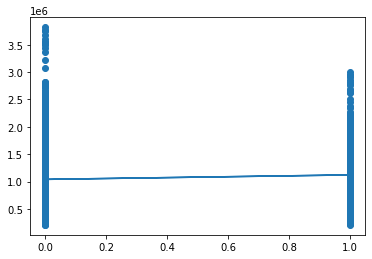

In [126]:
#Weekly sales vs Holidays
x = df['Holiday_Flag']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

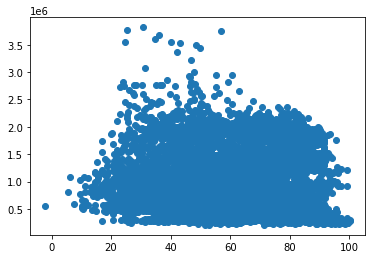

-0.06381001317946962


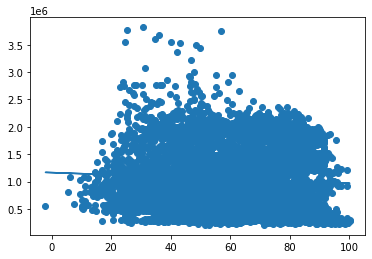

In [127]:
#Weekly sales vs Temperature
x = df['Temperature']
y = df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()